In [23]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps
import os
import numpy as np


In [14]:
#load data
(train_images, train_lables),(test_images, test_lables)= mnist.load_data()

In [15]:
#Preprocessing
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_lables = to_categorical(train_lables)
test_lables = to_categorical(test_lables)

In [16]:
#Network architecture
CNN = Sequential()
CNN.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Conv2D(64, (3,3), activation = 'relu'))
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Conv2D(64, (3,3), activation = 'relu'))
CNN.add(Flatten())
CNN.add(Dense(128,activation = 'relu'))
CNN.add(Dropout(0.2))
CNN.add(Dense(10, activation = 'softmax'))

In [17]:
#optimization
CNN.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [18]:
#Training
cnn_network = CNN.fit(train_images, train_lables, epochs = 5, batch_size = 64)

Epoch 1/5


2022-08-16 21:34:35.100718: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


938/938 [==============================] - 39s 41ms/step - loss: 0.1907 - accuracy: 0.9405
Epoch 2/5
938/938 [==============================] - 38s 40ms/step - loss: 0.0542 - accuracy: 0.9836
Epoch 3/5
938/938 [==============================] - 38s 40ms/step - loss: 0.0392 - accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 38s 41ms/step - loss: 0.0300 - accuracy: 0.9905
Epoch 5/5
938/938 [==============================] - 37s 40ms/step - loss: 0.0236 - accuracy: 0.9926


In [19]:
CNN.evaluate(test_images,test_lables)

313/313 [==============================] - 3s 8ms/step - loss: 0.0430 - accuracy: 0.9861


[0.04299657791852951, 0.9861000180244446]

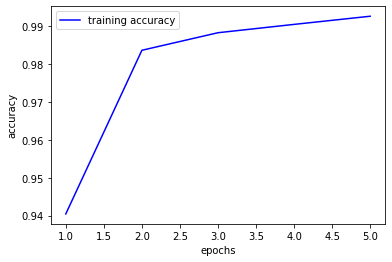

In [20]:
cnn_dict = cnn_network.history
accuracy_values = cnn_dict['accuracy']
epochs = range(1, len(accuracy_values)+1)
plt.plot(epochs,accuracy_values, 'b',label = 'training accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()



In [24]:
direction = '/home/sara/Documents/VsCode'
os.chdir(direction)

myImage = Image.open("images.jpeg").convert('L')
myImage = PIL.ImageOps.invert(myImage)
myImage = myImage.resize((28,28))
myImage.show()


myImage_array = np.array(myImage)
myImage_array = myImage_array.reshape((28*28))
myImage_array = myImage_array.astype('float32') / 255
myImage_array=myImage_array.reshape(1,784)

print(CNN.predict(myImage_array))

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 784)
